# Introduction
Importing all the necessary libraries

In [5]:
# Import our libraries
import pandas as pd
import numpy as np

# Import sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score

# Import the Naive Bayes, logistic regression, Bagging, RandomForest, AdaBoost, GradientBoost, Decision Trees and SVM Classifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#from matplotlib import style
#plt.style.use('bmh')
#plt.style.use('ggplot')
plt.style.use('seaborn-notebook')

from matplotlib.ticker import StrMethodFormatter

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



Reading the training(learning) and test data

In [7]:
test_df = pd.read_csv("./kaggle/input/titanic/test.csv")
train_df = pd.read_csv("./kaggle/input/titanic/train.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Data Preprocessing

In [8]:
#Concatening train_df & test_df 
train_test_df = pd.concat([train_df, test_df])

After concatenation I've tried to extract titles from names and create another column where I can stor those titles. By doing this an insightful information can be gathered on who of all these could survive and who could not!
But some titles have only 1 representation so I rolled them into one category like "Dona", "Capt", "Mme" into "Royalty" category.

# Name Title Extraction

In [7]:
#Extracting Name and creating a new column 'Title'
train_test_df['Title'] = train_test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False).values


In [8]:
train_test_df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [9]:
train_test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [10]:
#Replacing one representor of Title into one categorie
train_test_df['Title'] = train_test_df['Title'].replace(['Col','Dr',\
                                            'Major', 'Rev', 'Sir'], 'Officer')
train_test_df['Title'] = train_test_df['Title'].replace(['Don','Jonkheer',\
                                            'Countess', 'Dona', 'Capt', 'Mme'], 'Royalty')
train_test_df['Title'] = train_test_df['Title'].replace('Ms', 'Miss')
train_test_df['Title'] = train_test_df['Title'].replace('Mlle', 'Mrs')
train_test_df['Title'] = train_test_df['Title'].replace('Lady', 'Mrs')

Lastly after extrating and modifying name titles, actual "Name" column is no use. So I droped it.

In [11]:
#Drop the name column
train_test_df = train_test_df.drop(['Name'], axis=1)


In [12]:
train_test_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [13]:
train_test_df['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

Here I've ploted, which title survived the most. In x-axis I placed "title" and y-axis with "survived".  

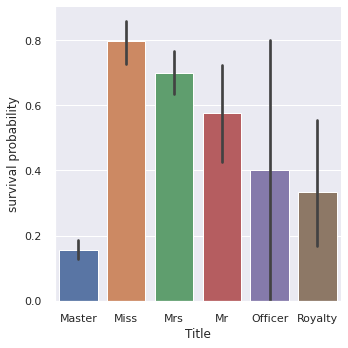

In [24]:
g = sns.catplot(x="Title",y="Survived",data=train_test_df,kind="bar")
g = g.set_xticklabels(["Master","Miss","Mrs","Mr","Officer", "Royalty"])
g = g.set_ylabels("survival probability")

In this plot we can see "Miss" and "Mrs" have the high probability of survival wich is female group. Master have very low survival rate.

I dropped the "PassengerId" as it's just counting number of passengers, it might create misconception while training the data.

In [14]:
train_test_df = train_test_df.drop(['PassengerId'], axis=1)


# Cabin Extraction

In here, I created a dictionary first. Then in "Cabin" column all NaN value replaced with "U0". Passangers on U cabin was high and then I extracted all first letter from cabin column and mapped it with deck column. Now "Deck" is a new column where first letter of cabin are placed.
and all the null values are filled with "U".

In [15]:
import re
deck = {"A": "A", "B": "B", "C": "C", "D": "D", "E": "E", "F": "F", "G": "G", "U": "U"}

train_test_df['Cabin'] = train_test_df['Cabin'].fillna("U0")
train_test_df['Deck'] = train_test_df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
train_test_df['Deck'] = train_test_df['Deck'].map(deck)
train_test_df['Deck'] = train_test_df['Deck'].fillna("U")

In [16]:
#Droop the Cabin column
#train_test_df = train_test_df.drop(['Cabin'], axis=1)
train_test_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,U0,S,Mr,U
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,Miss,U
3,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,C
4,0.0,3,male,35.0,0,0,373450,8.0500,U0,S,Mr,U


# Fare 

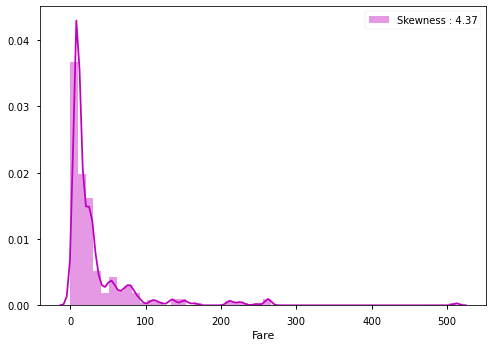

In [9]:
g = sns.distplot(train_test_df["Fare"], color="m", label="Skewness : %.2f"%(train_test_df["Fare"].skew()))
g = g.legend(loc="best")

When we see its plot representation, we see that there are a lot of high values (Called outliers). Such high values would bump up overall average fare. In such cases when we have a lot of outlier values, we can impute median value to missing rows. 

In [17]:
train_test_df['Fare'] = train_test_df['Fare'].fillna(train_test_df['Fare'].median())
train_test_df['Fare'] = train_test_df['Fare'].astype(int)

# Embarked

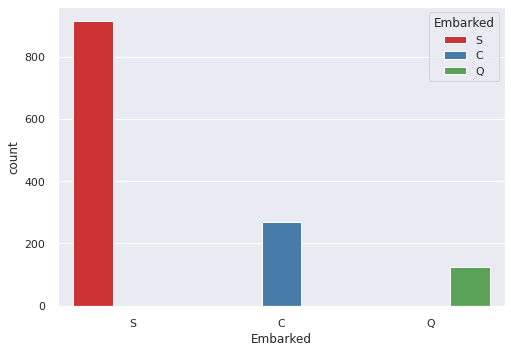

In [18]:
# People who embarked from different ports 
sns.set(style="darkgrid")
sns.countplot( x='Embarked', data=train_test_df, hue="Embarked", palette="Set1");

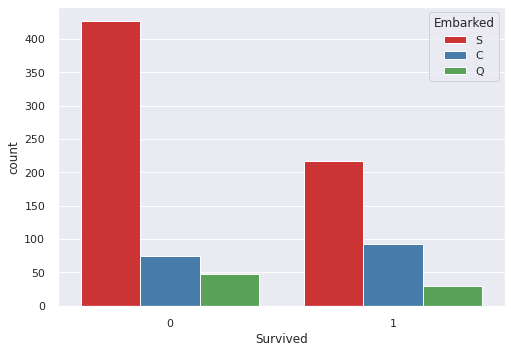

In [19]:
#In previous embarked plot from "S" port many people embarked and in this plot people also
# from "S" port have survived the most.
sns.set(style="darkgrid")
sns.countplot( x='Survived', data=train_df, hue="Embarked", palette="Set1");

In [21]:
train_test_df['Embarked'].isnull().sum()

2

In [22]:
# As there is only two null values in embarked and most of the people are from "S" port 
#so we will fill those null values with "S".
train_test_df['Embarked'] = train_test_df['Embarked'].fillna('S')

# Sib and Prach

We have Parch, SibSp columns. They represent the family members with the passengers on the ship. We could add both the columns as below and come up with total family members since it would add value to the overall context. There could be more survival for people who were together. So new column "relstives" is created where sum of parch and sib column are stored.

In [25]:
train_test_df['relatives'] = train_test_df['SibSp'] + train_test_df['Parch']


In [26]:
train_test_df['relatives'].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: relatives, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


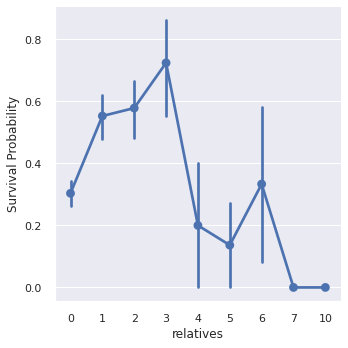

In [36]:
g = sns.factorplot(x="relatives",y="Survived",data = train_test_df)
g = g.set_ylabels("Survival Probability")

**The family size seems to play an important role, survival probability is worst for large families.**

In [ ]:
train_test_df.head(20)

# Age

We can group 'Sex', 'Pclass' and 'Title' and find the median age per each such group. This way, we would be imputing nearly accurate values to missing ones.

In [ ]:
train_test_df.groupby(by=['Pclass','Sex', 'Title']).median()['Age']

In [ ]:
train_test_df['Age'] = train_test_df.groupby(by=['Pclass','Sex', 'Title'])['Age'].transform(lambda x: x.fillna(x.median()))

In [10]:
train_test_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Ticket

"Ticket" is very complicated column to extract information so extracting any features from this column could make miscalculate the accuracy of survival. So I dropped the colummn.

In [ ]:
train_test_df = train_test_df.drop(['Ticket'], axis=1)


# Get Dummies

Creating the dummies of categorical variable will convert them into numeric values.

In [ ]:
train_test_df.isna().sum()

In [ ]:
train_test_df = pd.get_dummies(train_test_df, columns = ['Sex','Embarked','Title','Deck','Pclass','Cabin'])


In [ ]:
train_df = train_test_df[:891]
test_df = train_test_df[891:]

In [ ]:
train_df

In [ ]:
test_df

In [ ]:
X_train = train_df.drop('Survived',axis=1)
y_train = train_df['Survived']

In [ ]:
y_train

In [ ]:
X_test = test_df.drop('Survived',axis=1).copy()


In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# scaler = MinMaxScaler()
# # scaler = StandardScaler()
# X_train_scaled = X_train.copy()
# X_test_scaled = X_test.copy() 
# X_train_scaled[['Age','Fare']] = scaler.fit_transform(X_train_scaled[['Age','Fare']])
# X_test_scaled[['Age','Fare']] = scaler.transform(X_test_scaled[['Age','Fare']])


In [ ]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
# X_train_scaled = X_train.copy()
# X_test_scaled = X_test.copy() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train)

# Logistic Regression
accuracy 0.78229

In [ ]:
# logreg = LogisticRegression()
# logreg.fit(X_train_scaled, y_train)
# # y_val_pred = logreg.predict(X_val_scaled)
# logreg_predictions = logreg.predict(X_test_scaled).astype('int')
# # logreg_data = pd.read_csv('/kaggle/input/titanic/test.csv')
# # output = pd.DataFrame({'PassengerId': logreg_data.PassengerId, 'Survived': logreg_predictions})
# # output.to_csv('submission.csv', index=False)

# Random Forest
accuracy 0.73684

In [ ]:
# random_forest = RandomForestClassifier()
# random_forest.fit(X_train_scaled, y_train)

# random_forest_predictions = random_forest.predict(X_test_scaled).astype('int')

# # rf_data = pd.read_csv('/kaggle/input/titanic/test.csv')
# # output = pd.DataFrame({'PassengerId': rf_data.PassengerId, 'Survived': random_forest_predictions})
# # output.to_csv('submission.csv', index=False)

# GridSearchCV with Random Forest

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'max_depth': [5,7,9], 
#               'min_samples_split': [40,60],
#               'max_features': ['auto'],
#               'n_estimators':[100,200],
#               'oob_score':[True],
#               'random_state':[42]} 
# gsearch0 = GridSearchCV(estimator = RandomForestClassifier(), 
#                           refit = True, cv=10, verbose = 2, param_grid=param_grid)
# gsearch0.fit(X_train_scaled, y_train)


In [2]:
# gsearch0.best_estimator_


In [ ]:
# gsearch0_pred = gsearch0.predict(X_test_scaled).astype(int)
# rf_data = pd.read_csv('/kaggle/input/titanic/test.csv')
# output = pd.DataFrame({'PassengerId': rf_data.PassengerId, 'Survived': gsearch0_pred})
# output.to_csv('submission.csv', index=False)

# SVM classifier
accuracy 0.77511

In [ ]:
# # train the model on train set
# svm_model = SVC(C = 1000, gamma = 0.001, kernel  = 'rbf', probability=True )
# svm_model.fit(X_train_scaled, y_train)
# # print prediction results
# svm_predictions = svm_model.predict(X_test_scaled).astype(int)
# # svm_data = pd.read_csv('/kaggle/input/titanic/test.csv')
# # output = pd.DataFrame({'PassengerId': svm_data.PassengerId, 'Survived': svm_predictions})
# # output.to_csv('submission.csv', index=False)

# GridSearchCV using SVM
accuracy 0.76794

In [ ]:
# from sklearn.model_selection import GridSearchCV
  
# # # defining parameter range
# param_grid = {'C': [10, 100, 1000], 
#               'gamma': [0.1, 0.01, 0.001],
#               'kernel': ['rbf']} 
  
# # grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# # fitting the model for grid search
# gsearch1 = GridSearchCV(estimator = SVC(probability=True), 
#                          refit = True, cv=10, verbose = 2, param_grid=param_grid)
# gsearch1.fit(X_train_scaled, y_train)

In [ ]:
# gsearch1_best = gsearch1.best_estimator_
# gsearch1_best

In [ ]:
# gsearch1.best_score_

In [ ]:
# gsearch1.best_params_

In [ ]:
# gsearch_pred = gsearch1.predict(X_test_scaled).astype(int)

In [ ]:
# gsearch1_pred = gsearch1.predict(X_test_scaled).astype(int)
# svm_data = pd.read_csv('/kaggle/input/titanic/test.csv')
# output = pd.DataFrame({'PassengerId': svm_data.PassengerId, 'Survived': gsearch1_pred})
# output.to_csv('submission.csv', index=False)

# GridSearchCV using XG
accuracy 0.75358

In [ ]:
# from sklearn.model_selection import GridSearchCV
  
# # # # defining parameter range
# param_grid = {'n_estimators': [200],
#               'max_depth': [3],
#               'min_child_weight': [1],
#               'gamma':[0.1],
#               'learning_rate': [0.1],
#               'colsample_bytree':[0.4]}
#                 'n_estimators': [100,200,500,1000],
# #               'max_depth': [3,5,7,9],
# #               'min_child_weight': [1,3,5],
# #               'gamma':[1, 0.1, 0.01],
# #               'learning_rate': [0.01, 0.1],
# #               'colsample_bytree':[0.2, 0.4, 0.6]
                 
# gsearch2 = GridSearchCV(XGBClassifier(), refit = True, cv=10, verbose =2, param_grid=param_grid)
  
# gsearch2.fit(X_train_scaled, y_train)

In [ ]:
# gsearch2_best = gsearch2.best_estimator_
# gsearch2_best

In [ ]:
# gsearch2_pred = gsearch2.predict(X_test_scaled).astype(int)
# svm_data = pd.read_csv('/kaggle/input/titanic/test.csv')
# output = pd.DataFrame({'PassengerId': svm_data.PassengerId, 'Survived': gsearch2_pred})
# output.to_csv('submission.csv', index=False)

In [ ]:
# gsearch2.best_score_

In [ ]:
# gsearch2.best_params_

# Ensambling Voting
accurcy 0.76555

In [ ]:
# from sklearn.ensemble import VotingClassifier
# votingC = VotingClassifier(estimators=[('rfc', random_forest), ('logistic', logreg),
# ('svm', svm_model)], voting='hard', n_jobs=4)

# votingC = votingC.fit(X_train_scaled, y_train)


In [ ]:
# voting_pred = votingC.predict(X_test_scaled).astype(int)


In [ ]:
# vote_data = pd.read_csv('/kaggle/input/titanic/test.csv')
# output = pd.DataFrame({'PassengerId': vote_data.PassengerId, 'Survived': voting_pred})
# output.to_csv('submission.csv', index=False)

# Conclusion

After doing data preprocessing, I tried some model to train data Logistic regression, Random forest, SVM, XGboost and have also done hyper parameter tuning with GridSearchCV annd lastly used voting classifier from ensamble method. I've got cross validation accuracy around 83% - 85% and test accuracy was around 77%-78% with logistic regression and SVM.
During hyperparameter tuning with XGBooost model,cross validation accuracy was around 84% but test accuracy was 75% which is kind of overfit the data. So I avoid to choose this model. 
But hyperparameter tuning with random forest, cross validation accuracy and test accuracy was close enough. So it didn't overfit the data as well a good accuracy score was obtained. 
In my experience doing GridSearchCV with random forest was best for this Titanic project. In Kaggle Titanice project leaderboared, I was in 10%.


![alternative text](leaderboard.png)